In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 42.1 MB/s 
     |████████████████████████████████| 16.7 MB 360 kB/s 


In [3]:
import pandas as pd
import geopandas as gpd
from collections import Counter
import matplotlib.pyplot as plt
import tqdm

import warnings
warnings.filterwarnings("ignore") 

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
yelp = r'/content/gdrive/MyDrive/phily21.csv'
data = pd.read_csv(yelp)

In [6]:
food_y = data[data.categories.notna()].categories.str.contains('food|restaurant',case=False)
food_yelp = data[data.categories.notna()][food_y]
food_yelp.reset_index(inplace=True, drop=True)

In [7]:
shape_map_path = r"/content/gdrive/MyDrive/business_licenses/business_licenses.shp"
shape_map = gpd.read_file(shape_map_path)

license = shape_map.to_crs(epsg=4326)  # EPSG 4326 = WGS84 = https://epsg.io/4326

In [8]:
food_l = license.licensetyp.str.contains('Food', case=False)
food_license = license[food_l]
food_license.reset_index(inplace=True, drop=True)

In [9]:
food_license.loc[:, 'longitude'] = food_license.geometry.x
food_license.loc[:, 'latitude'] = food_license.geometry.y

In [11]:
food_license[food_license.licensesta =='Active'][['licensetyp','initialiss', 'mostrecent', 'expiration', 'inactiveda', 'licensesta']]

licensetyp  initialiss  \
35     Food Estab, Retail Non-Permanent Location (Ann...  2004-06-14   
84     Food Estab, Retail Non-Permanent Location (Ann...  2004-07-01   
94                        Food Manufacturer / Wholesaler  2004-04-29   
112                       Food Manufacturer / Wholesaler  2004-04-23   
133                       Food Manufacturer / Wholesaler  2004-09-13   
...                                                  ...         ...   
42524                         Food Preparing and Serving  2022-03-07   
42525                         Food Preparing and Serving  2021-12-13   
42526                         Food Preparing and Serving  2021-12-27   
42527      Food Establishment, Retail Permanent Location  2021-12-27   
42528             Food Preparing and Serving (30+ SEATS)  2022-01-12   

       mostrecent  expiration inactiveda licensesta  
35     2021-05-03  2022-04-30       None     Active  
84     2021-06-30  2022-04-30       None     Active  
94     2021-04-12  2022-04-30       None     Active  
112    2021-04-20  2022-04-30       None     Active  
133    2021-07-02  2022-04-30       None     Active  
...           ...         ...        ...        ...  
42524  2022-03-07  2023-03-06       None     Active  
42525  2021-12-13  2022-12-12       None     Active  
42526  2021-12-27  2022-12-26       None     Active  
42527  2021-12-27  2022-12-26       None     Active  
42528  2022-01-12  2023-01-11       None     Active  

[8275 rows x 6 columns]

In [12]:
close_2018 = food_license[(food_license.expiration.str[:4] =='2018') | (food_license.inactiveda.str[:4] =='2018')]

In [19]:
close_2019 = food_license[(food_license.expiration.str[:4] =='2019') | (food_license.inactiveda.str[:4] =='2019')]

In [20]:
close_2020 = food_license[(food_license.expiration.str[:4] =='2020') | (food_license.inactiveda.str[:4] =='2020')]

In [21]:
close_2021 = food_license[(food_license.expiration.str[:4] =='2021') | (food_license.inactiveda.str[:4] =='2021')]

In [39]:
close_2018.shape

(2394, 33)

In [29]:
food_license[(food_license.inactiveda.str[:4] == '2020')|((food_license.expiration.str[:4] =='2020') &(food_license.inactiveda== None))][['licensetyp','initialiss', 'mostrecent', 'expiration', 'inactiveda', 'licensesta']]

licensetyp  initialiss  \
29     Food Estab, Retail Non-Permanent Location (Ann...  2001-05-15   
47     Food Estab, Retail Non-Permanent Location (Ann...  2004-06-29   
74     Food Estab, Retail Non-Permanent Location (Ann...  2004-04-28   
95                        Food Manufacturer / Wholesaler  2004-04-17   
108                       Food Manufacturer / Wholesaler  2004-04-16   
...                                                  ...         ...   
40482                         Food Preparing and Serving  2019-10-11   
40488                         Food Preparing and Serving  2019-09-09   
40491             Food Preparing and Serving (30+ SEATS)  2019-09-12   
40492                         Food Preparing and Serving  2019-09-19   
40495             Food Preparing and Serving (30+ SEATS)  2019-10-03   

       mostrecent  expiration  inactiveda licensesta  
29     2019-05-28  2020-04-30  2020-06-29   Inactive  
47     2019-05-13  2020-04-30  2020-06-29     Closed  
74     2019-05-31  2020-04-30  2020-06-29   Inactive  
95     2019-04-30  2020-04-30  2020-06-29   Inactive  
108    2019-04-25  2020-04-30  2020-06-29   Inactive  
...           ...         ...         ...        ...  
40482  2019-10-11  2020-10-10  2020-12-09   Inactive  
40488  2019-09-09  2020-09-08  2020-11-07   Inactive  
40491  2019-09-12  2020-09-11  2020-11-10   Inactive  
40492  2019-09-19  2020-09-18  2020-11-17   Inactive  
40495  2019-10-03  2020-10-02  2020-12-01   Inactive  

[1948 rows x 6 columns]

In [41]:
food_license[((food_license.expiration.str[:4] =='2019')& (food_license.inactiveda.isna())) | (food_license.expiration.str[:4] == '2019')][['licensetyp','initialiss', 'mostrecent', 'expiration', 'inactiveda', 'licensesta']]

licensetyp  initialiss  \
80                        Food Manufacturer / Wholesaler  2004-04-19   
151                       Food Manufacturer / Wholesaler  2004-04-17   
181                       Food Manufacturer / Wholesaler  2004-04-16   
217    Food Estab, Retail Non-Permanent Location (Ann...  2003-06-26   
233    Food Estab, Retail Non-Permanent Location (Ann...  2003-12-02   
...                                                  ...         ...   
40508  Food Estab, Retail Non-Permanent Location (Event)  2019-09-12   
40509  Food Estab, Retail Non-Permanent Location (Event)  2019-09-12   
40511  Food Estab, Retail Non-Permanent Location (Event)  2019-09-19   
40512  Food Estab, Retail Non-Permanent Location (Event)  2019-09-19   
40513  Food Estab, Retail Non-Permanent Location (Event)  2019-09-19   

       mostrecent  expiration  inactiveda licensesta  
80     2018-04-04  2019-04-30  2019-06-29   Inactive  
151    2018-04-20  2019-04-30  2019-06-29   Inactive  
181    2018-04-23  2019-04-30  2019-06-29   Inactive  
217    2018-04-16  2019-04-30  2019-06-29   Inactive  
233    2018-04-16  2019-04-30  2019-06-29   Inactive  
...           ...         ...         ...        ...  
40508  2019-09-12  2019-09-14        None   Inactive  
40509  2019-09-12  2019-09-14        None   Inactive  
40511  2019-09-19  2019-09-21        None   Inactive  
40512  2019-09-19  2019-09-21        None   Inactive  
40513  2019-09-19  2019-09-21        None   Inactive  

[1971 rows x 6 columns]

In [42]:
food_license[((food_license.expiration.str[:4] =='2020')& (food_license.inactiveda.isna())) | (food_license.inactiveda.str[:4] == '2020')][['licensetyp','initialiss', 'mostrecent', 'expiration', 'inactiveda', 'licensesta']]

licensetyp  initialiss  \
29     Food Estab, Retail Non-Permanent Location (Ann...  2001-05-15   
47     Food Estab, Retail Non-Permanent Location (Ann...  2004-06-29   
74     Food Estab, Retail Non-Permanent Location (Ann...  2004-04-28   
95                        Food Manufacturer / Wholesaler  2004-04-17   
108                       Food Manufacturer / Wholesaler  2004-04-16   
...                                                  ...         ...   
40488                         Food Preparing and Serving  2019-09-09   
40491             Food Preparing and Serving (30+ SEATS)  2019-09-12   
40492                         Food Preparing and Serving  2019-09-19   
40495             Food Preparing and Serving (30+ SEATS)  2019-10-03   
41582  Food Estab, Retail Non-Permanent Location (Event)  2020-08-12   

       mostrecent  expiration  inactiveda licensesta  
29     2019-05-28  2020-04-30  2020-06-29   Inactive  
47     2019-05-13  2020-04-30  2020-06-29     Closed  
74     2019-05-31  2020-04-30  2020-06-29   Inactive  
95     2019-04-30  2020-04-30  2020-06-29   Inactive  
108    2019-04-25  2020-04-30  2020-06-29   Inactive  
...           ...         ...         ...        ...  
40488  2019-09-09  2020-09-08  2020-11-07   Inactive  
40491  2019-09-12  2020-09-11  2020-11-10   Inactive  
40492  2019-09-19  2020-09-18  2020-11-17   Inactive  
40495  2019-10-03  2020-10-02  2020-12-01   Inactive  
41582  2020-08-12  2020-10-31        None   Inactive  

[2078 rows x 6 columns]

In [44]:
food_license[((food_license.expiration.str[:4] =='2021')& (food_license.inactiveda.isna())) | (food_license.inactiveda.str[:4] == '2021')][['licensetyp','initialiss', 'mostrecent', 'expiration', 'inactiveda', 'licensesta']]

76       Inactive
81       Inactive
109      Inactive
304      Inactive
500      Inactive
           ...   
42134    Inactive
42142    Inactive
42143    Inactive
42162    Inactive
42291    Inactive
Name: licensesta, Length: 1425, dtype: object

In [35]:
food_license[((food_license.expiration.str[:4] =='2021') &(food_license.inactiveda == None)) | (food_license.inactiveda.str[:4] == '2021')][['licensetyp','initialiss', 'mostrecent', 'expiration', 'inactiveda', 'licensesta']]

licensetyp  initialiss  \
76     Food Estab, Retail Non-Permanent Location (Ann...  2004-07-13   
81                        Food Manufacturer / Wholesaler  2004-05-16   
109                       Food Manufacturer / Wholesaler  2004-05-09   
304                       Food Manufacturer / Wholesaler  2004-04-17   
500        Food Establishment, Retail Permanent Location  2004-11-22   
...                                                  ...         ...   
41808             Food Preparing and Serving (30+ SEATS)  2020-10-08   
41812  Food Estab, Retail Non-Permanent Location (Ann...  2020-10-22   
41813                         Food Preparing and Serving  2020-10-22   
41819                         Food Preparing and Serving  2020-08-12   
41824  Food Estab, Retail Non-Permanent Location (Ann...  2020-08-31   

       mostrecent  expiration  inactiveda licensesta  
76     2020-06-15  2021-04-30  2021-06-29   Inactive  
81     2020-05-06  2021-04-30  2021-06-29   Inactive  
109    2020-10-15  2021-04-30  2021-06-29   Inactive  
304    2020-04-17  2021-04-30  2021-06-29   Inactive  
500    2020-09-10  2021-04-30  2021-06-29   Inactive  
...           ...         ...         ...        ...  
41808  2020-10-08  2021-10-07  2021-12-06   Inactive  
41812  2020-10-22  2021-10-21  2021-12-20   Inactive  
41813  2020-10-22  2021-10-21  2021-12-20   Inactive  
41819  2020-08-12  2021-08-11  2021-10-10   Inactive  
41824  2020-08-31  2021-08-30  2021-10-29   Inactive  

[1297 rows x 6 columns]

In [78]:
close18 = food_license[food_license.inactiveda.str[:4] =='2018']

In [79]:
close19 = food_license[food_license.inactiveda.str[:4] =='2019']

In [80]:
close20 = food_license[food_license.inactiveda.str[:4] =='2020']

In [82]:
close21 = food_license[food_license.inactiveda.str[:4] =='2021']

In [54]:
iss18 = food_license[food_license.mostrecent.str[:4]=='2018']

In [55]:
iss19 = food_license[food_license.mostrecent.str[:4]=='2019']

In [56]:
iss20 = food_license[food_license.mostrecent.str[:4]=='2020']

In [57]:
iss21 = food_license[food_license.mostrecent.str[:4]=='2021']

In [59]:
open18  = food_license[food_license.initialiss.str[:4]=='2018']

In [60]:
open19  = food_license[food_license.initialiss.str[:4]=='2019']

In [61]:
open20 = food_license[food_license.initialiss.str[:4]=='2020']

In [73]:
open21 = food_license[food_license.initialiss.str[:4]=='2021']

In [66]:
BBox = ((food_license.longitude.min(),   food_license.longitude.max(),food_license.latitude.min(), food_license.latitude.max()))

In [67]:
BBox

(-75.27421196111419, -74.9593407520959, 39.88056964279092, 40.1342564553066)

In [68]:
ruh_m = plt.imread('/content/gdrive/MyDrive/map.png')

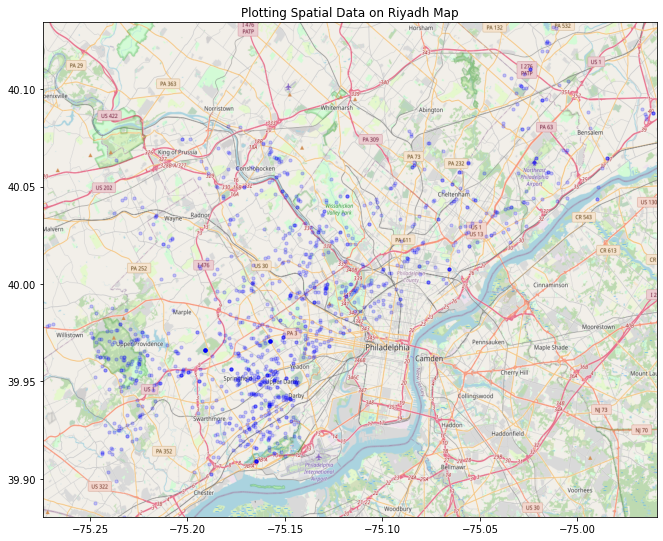

In [75]:
fig, ax = plt.subplots(figsize = (11,10))
ax.scatter(open21.longitude, open21.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

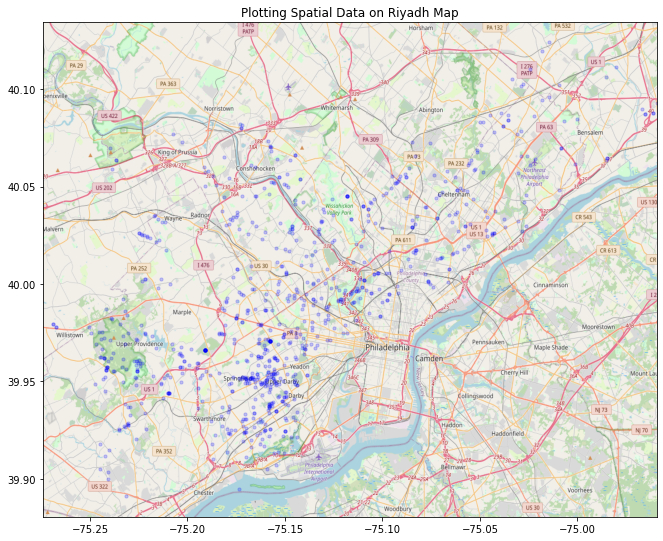

In [85]:
fig, ax = plt.subplots(figsize = (11,10))
ax.scatter(open20.longitude, open20.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

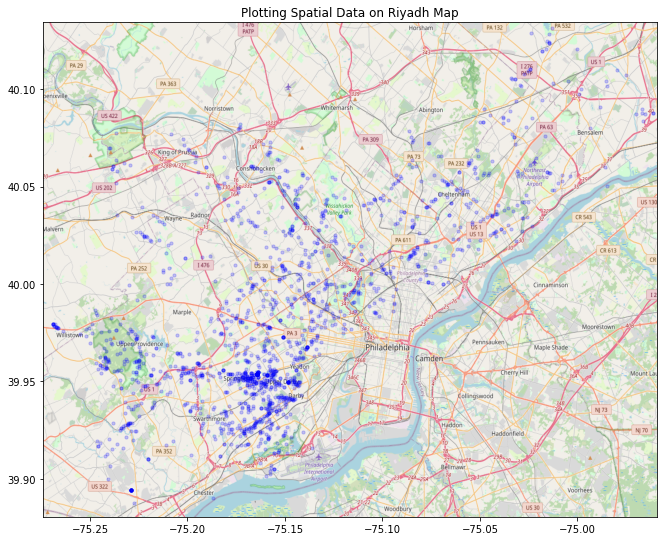

In [86]:
fig, ax = plt.subplots(figsize = (11,10))
ax.scatter(close20.longitude, close20.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

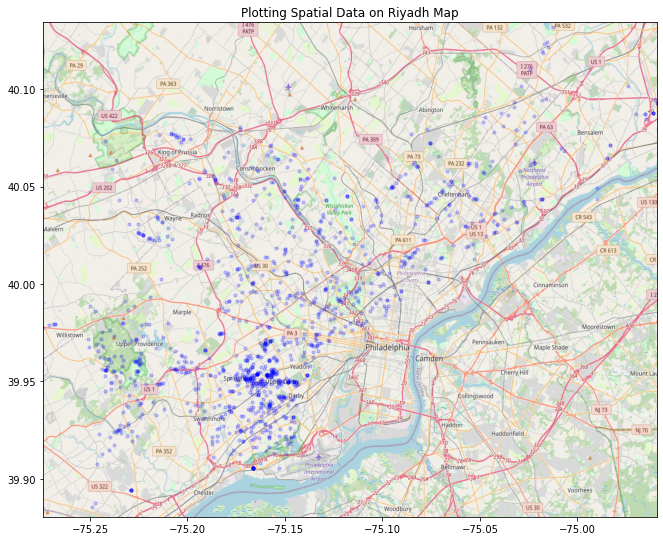

In [83]:
fig, ax = plt.subplots(figsize = (11,10))
ax.scatter(close21.longitude, close21.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

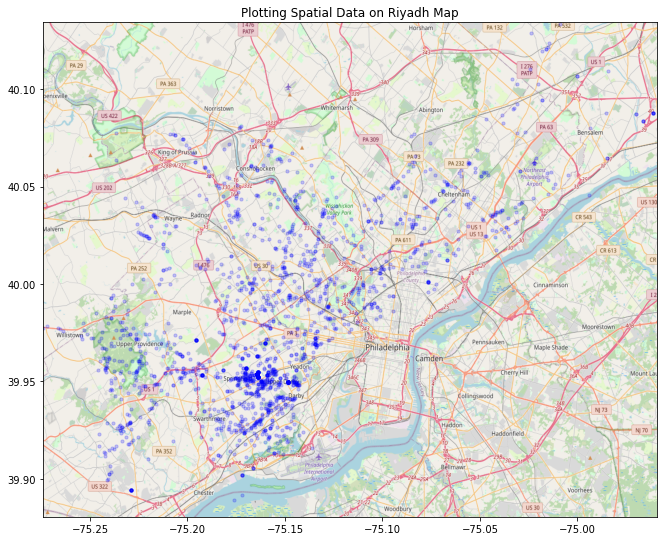

In [76]:
fig, ax = plt.subplots(figsize = (11,10))
ax.scatter(open18.longitude, open18.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

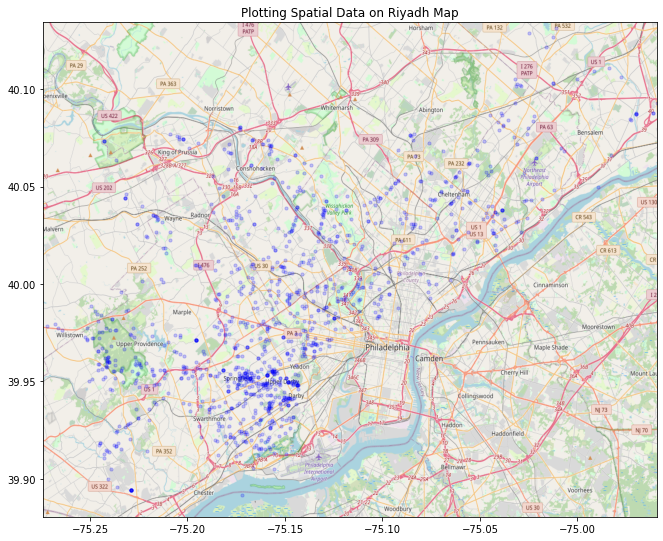

In [84]:
fig, ax = plt.subplots(figsize = (11,10))
ax.scatter(close18.longitude, close18.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')